<a href="https://colab.research.google.com/github/D-art9/Linear-regression-mini-projects/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fraud Detection Case Study

The goal is to predict whether a financial transaction is fraudulent.  
This helps reduce financial loss and improve trust for customers.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"


'Colab Notebooks'		     Fraud_raw_sample.csv
'Copy of Anureet kaur RESUME.gdoc'   resume-1752740732199.pdf
 Fraud.csv			    'SDC Interviews 2025.gsheet'


In [ ]:
!ls "/content/drive/MyDrive/Fraud.csv"


/content/drive/MyDrive/Fraud.csv


In [ ]:
import pandas as pd

# Replace with your folder name if you made one
data_path = "/content/drive/MyDrive/Fraud.csv"

df = pd.read_csv(data_path)  # load first 100k rows
print("Shape:", df.shape)


Shape: (6362620, 11)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
np.random.seed(42)


type → Transaction type (fraud is common in TRANSFER & CASH-OUT).

amount → Transaction value, large or unusual amounts may indicate fraud.

oldbalanceOrg / newbalanceOrig → Sender’s balance before & after transaction (fraudsters often drain accounts).

oldbalanceDest / newbalanceDest → Receiver’s balance before & after transaction (sudden jumps can be suspicious).

isFraud → Target variable (1 = Fraud, 0 = Normal)

In [ ]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
print(df['isFraud'].value_counts())
print(df['isFraud'].value_counts(normalize=True))


isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


/tmp/ipython-input-2946908244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='coolwarm')


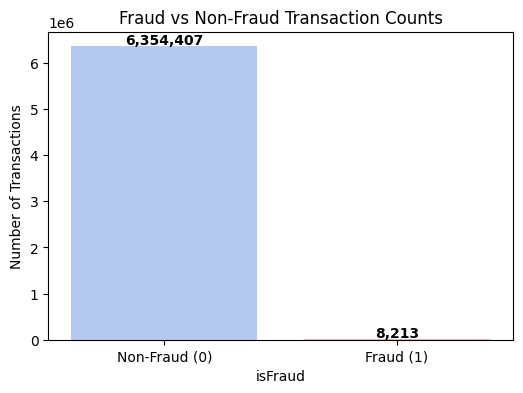

In [ ]:
class_counts = df['isFraud'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='coolwarm')
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.title('Fraud vs Non-Fraud Transaction Counts')
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 50000, f"{v:,}", ha='center', fontweight='bold')
plt.show()

Total transactions: 6,362,620

Fraudulent transactions (isFraud = 1): 8,213 (~0.13%)

Non-fraudulent transactions (isFraud = 0): 6,354,407 (~99.87%)

The dataset is extremely imbalanced.

Most transactions are legitimate, with only a tiny fraction being fraud.

Implications for modeling:

Accuracy alone is misleading — a model predicting all transactions as non-fraud would be 99.87% accurate but useless.

Must use metrics focused on rare events, e.g., Precision, Recall, F1-score, or PR-AUC.

May require class weighting or resampling techniques (SMOTE, undersampling, etc.) to handle imbalance.

In [ ]:
# Save a raw sample of the dataset (e.g., 100,000 rows)
sample_path = "/content/drive/MyDrive/Fraud_raw_sample.csv"
df.sample(100000, random_state=42).to_csv(sample_path, index=False)

print(f"Raw sample saved at: {sample_path}")


Raw sample saved at: /content/drive/MyDrive/Fraud_raw_sample.csv


**Starting EDA**

/tmp/ipython-input-3998275012.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette='coolwarm')


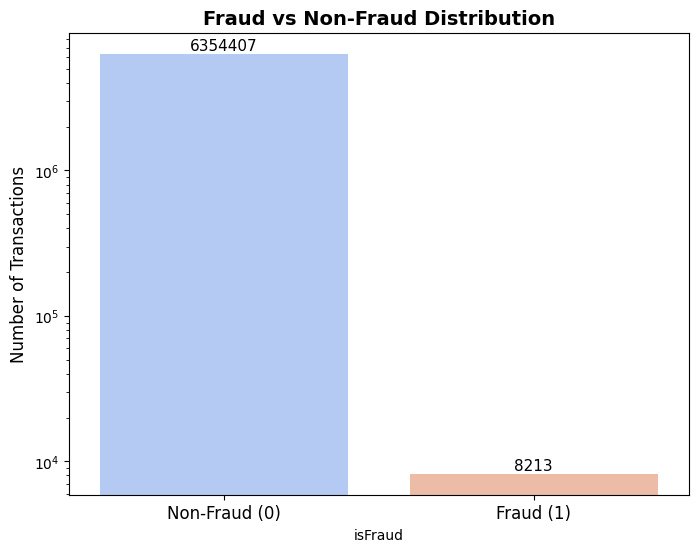

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='isFraud', data=df, palette='coolwarm')
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'], fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Fraud vs Non-Fraud Distribution', fontsize=14, fontweight='bold')

# Log scale on y-axis
plt.yscale('log')

# Add count labels on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=11)

plt.show()


Fraud vs Non-Fraud Distribution:
Non-fraudulent transactions far outnumber fraudulent ones. The y-axis is scaled to clearly show both categories, highlighting the dataset’s imbalance for modeling purposes.

In [ ]:
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
                'oldbalanceDest', 'newbalanceDest']

# Create a copy of the dataframe to scale
df_scaled = df.copy()

# Apply Min-Max scaling
scaler = MinMaxScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Set pandas option to display floats nicely without scientific notation
pd.options.display.float_format = '{:.4f}'.format  # 4 decimal places

# Show descriptive statistics of scaled columns
print(df_scaled[numeric_cols].describe())

NameError: name 'MinMaxScaler' is not defined

**Transaction Step (step)**

Mean: 0.3267 → On average, transactions occur early in the normalized timeline.

Spread: Std = 0.1918 → Moderate variation.

Insight: Transactions are somewhat evenly distributed over the time period but slightly concentrated in earlier steps.

**Transaction Amount (amount)**

There are a few extremely large transactions (potentially suspicious).

Insight: The amount distribution is highly skewed; large amounts are rare and could be flagged for fraud.

**Origin Account Balance**

Most accounts have small balances in scaled terms.
Over half of transactions involve accounts with very low balances.
Large outgoing transactions from accounts with small balances could indicate fraudulent activity.

**Destination Account Balance**

Most destination accounts also have very small balances.Many destination accounts start empty.Transfers to empty or low-balance accounts are common; unusually large incoming balances could indicate money laundering or fraud.

amount and balances are key indicators for fraud detection.

step can help identify temporal patterns (fraud may happen at specific times).

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['amount'], bins=50, log_scale=True)
plt.title('Transaction Amount Distribution (Log Scale)')
plt.show()


The histogram of transaction amounts, even on a log scale, shows that the distribution is heavily skewed to the right. This means that most transactions are of smaller amounts, while there are a few transactions with very large amounts. This is typical for financial transaction data, where high-value transactions are much less frequent than low-value ones.

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='amount', data=df)
plt.title('Boxplot of Transaction Amounts')
plt.show()


The boxplot shows that most transactions are for small amounts. There are a lot of transactions that are much, much larger than the rest – these are the dots scattered far to the right.

In [ ]:
df['type'].value_counts()


In [ ]:
type_counts = df['type'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='coolwarm')

# Highlight high-risk types
for i, t in enumerate(type_counts.index):
    if t in ['TRANSFER', 'DEBIT']:
        plt.gca().patches[i].set_edgecolor('black')
        plt.gca().patches[i].set_linewidth(2)

# Labels and title
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Transaction Type', fontsize=12)
plt.title('Transaction Type Distribution (High-Risk Types Highlighted)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols + ['isFraud']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Data Cleaning & Preprocessing**

Finding null  values

In [ ]:
missing = df.isnull().sum().to_frame(name='count')
missing['percent'] = missing['count'] / len(df) * 100
print(missing)


No missing values yay!!

In [ ]:
df.drop_duplicates(inplace=True)


the above code removes duplicates

**Fix data types**

In [ ]:
df['type'] = df['type'].astype('category')


outlier **Handling**

to handle outliers we will do simple capping

In [ ]:
# List of numeric columns to cap
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in numeric_cols:
    # Compute 1st and 99th percentiles
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)

    # Apply capping
    df[col + '_capped'] = df[col].clip(lower=lower, upper=upper)

    print(f"{col} capped: min={df[col + '_capped'].min()}, max={df[col + '_capped'].max()}")


amount capped: min=449.46760000000006, max=1615979.4715999917
oldbalanceOrg capped: min=0.0, max=16027256.133699985
newbalanceOrig capped: min=0.0, max=16176160.557999993
oldbalanceDest capped: min=0.0, max=12371819.154799988
newbalanceDest capped: min=0.0, max=13137866.940999895


**Feature Engineering**
Create new features that capture signals of fraud.

*Log-transform for skewed amounts* helps to normalise values

In [ ]:
df['log_amount'] = np.log1p(df['amount_capped'])


Extract time-based features from step

In [ ]:
df['hour'] = df['step'] % 24
df['day_of_week'] = (df['step'] // 24) % 7


/tmp/ipython-input-589578966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=fraud_df, palette='Reds_r')


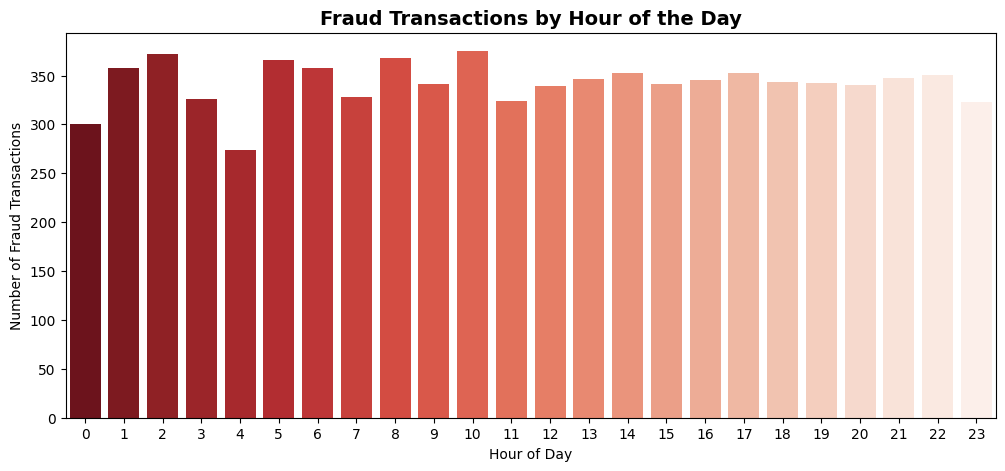

/tmp/ipython-input-589578966.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=fraud_df, palette='Reds_r')


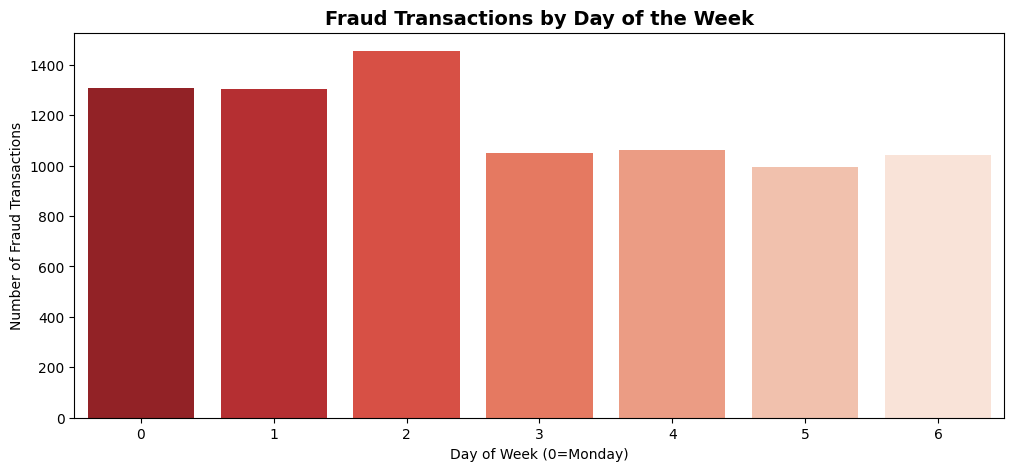

In [ ]:
# Filter only fraud transactions
fraud_df = df[df['isFraud'] == 1]

# Fraud by hour
plt.figure(figsize=(12,5))
sns.countplot(x='hour', data=fraud_df, palette='Reds_r')
plt.title('Fraud Transactions by Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraud Transactions')
plt.show()

# Fraud by day of the week
plt.figure(figsize=(12,5))
sns.countplot(x='day_of_week', data=fraud_df, palette='Reds_r')
plt.title('Fraud Transactions by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Number of Fraud Transactions')
plt.show()

What this does:

By hour: Shows which hours of the day have more fraud. You might see spikes at night or early morning.

By day: Shows which days of the week have more fraud, which can highlight weekly patterns.

By Hour: Fraud happens throughout the day, but there are slight bumps in the morning and early afternoon hours.

 By Day: Fraud is more common earlier in the week (Monday to Wednesday) and less so towards the weekend.

**Balance differences**

In [ ]:
df['diff_old_new_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['diff_old_new_dest'] = df['newbalanceDest'] - df['oldbalanceDest']


**Convert categorical type to numeric:**

In [ ]:
# Frequency encoding
type_freq = df['type'].value_counts(normalize=True)
df['type_freq'] = df['type'].map(type_freq)


txn_count_last_24h = number of transactions the origin account made in the last 24 hours


In [ ]:
df = df.sort_values(['nameOrig','step'])
df['txn_count_last_24h'] = df.groupby('nameOrig')['step'].rolling(24, min_periods=1).count().reset_index(0,drop=True)


In [ ]:
df['amount_type_interaction'] = df['log_amount'] * df['type_freq'].astype(float)


**Train/Validation Splitting & Sampling Strategy**

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['isFraud'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, stratify=train_df['isFraud'], random_state=42)

In [ ]:
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

Train shape: (3817572, 24)
Validation shape: (1272524, 24)
Test shape: (1272524, 24)


That code prints the fraud vs non-fraud percentage in Train, Validation, and Test sets to confirm that the class ratios are preserved after splitting.

In [ ]:
for split, data in zip(['Train','Val','Test'], [train_df, val_df, test_df]):
    print(split)
    print(data['isFraud'].value_counts(normalize=True))


Train
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64
Val
isFraud
0    0.99871
1    0.00129
Name: proportion, dtype: float64
Test
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


**We need to separate input features (X) and output label (y) for train, validation, test**

In [ ]:
# Train split
X_train = train_df.drop("isFraud", axis=1)
y_train = train_df["isFraud"]

# Validation split
X_val = val_df.drop("isFraud", axis=1)
y_val = val_df["isFraud"]

# Test split
X_test = test_df.drop("isFraud", axis=1)
y_test = test_df["isFraud"]


Handle Categorical Columns

👉 Models like Logistic Regression need numbers only.
We must encode categorical features like type, nameOrig, nameDest.

In [ ]:
# Drop high-cardinality columns
X_train = X_train.drop(["nameOrig", "nameDest"], axis=1)
X_val = X_val.drop(["nameOrig", "nameDest"], axis=1)
X_test = X_test.drop(["nameOrig", "nameDest"], axis=1)

# One-hot encode 'type'
X_train = pd.get_dummies(X_train, columns=["type"])
X_val = pd.get_dummies(X_val, columns=["type"])
X_test = pd.get_dummies(X_test, columns=["type"])

# Align columns (important so train/val/test have same structure)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


training the model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Build pipeline: scaling + logistic regression
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # step 1: scale features
    ('log_reg', LogisticRegression(
        class_weight='balanced',    # handle imbalance
        max_iter=2000,              # large enough to converge
        solver='lbfgs',             # good default for large datasets
        n_jobs=-1                   # use all CPU cores
    ))
])

# Train on training set
log_reg_pipeline.fit(X_train, y_train)

# Validate on validation set
y_val_pred = log_reg_pipeline.predict(X_val)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Confusion Matrix:
 [[1211594   59288]
 [     55    1587]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98   1270882
           1       0.03      0.97      0.05      1642

    accuracy                           0.95   1272524
   macro avg       0.51      0.96      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



**Check ROC-AUC Score to see overall discrimination ability.**

In [ ]:
from sklearn.metrics import roc_auc_score
y_val_prob = log_reg_pipeline.predict_proba(X_val)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_val, y_val_prob))


ROC-AUC Score: 0.9937676407573246


In [ ]:
# Use the original training feature names
feature_names = X_train.columns

# Get coefficients from logistic regression
coefs = log_reg_pipeline.named_steps['log_reg'].coef_[0]

# Pair features with coefficients and sort by importance
importance = sorted(zip(feature_names, coefs), key=lambda x: abs(x[1]), reverse=True)

# Show top 15 important features
print("Top 15 Important Features:")
for feature, coef in importance[:15]:
    print(f"{feature}: {coef:.4f}")


Top 15 Important Features:
newbalanceOrig: -103.2281
oldbalanceOrg: 95.7560
type_CASH_OUT: 93.0524
type_CASH_IN: -71.2355
type_PAYMENT: -61.8511
type_TRANSFER: 54.5461
amount: -13.5411
type_DEBIT: -9.5443
isFlaggedFraud: 0.5670
oldbalanceDest: -0.5202
newbalanceDest: 0.4602
step: 0.3482


What We Found From the Model

How well the model works

The model is very good at telling fraud apart from normal transactions (ROC-AUC ≈ 0.99).

It catches almost all fraud cases (recall ≈ 97%).

It sometimes raises false alarms (precision ≈ 3%), but that’s okay in fraud detection because missing a fraud is worse than checking a few extra cases.

What matters most in detecting fraud

Transaction Type:

Fraud mostly happens in CASH_OUT and TRANSFER.

Transactions like CASH_IN and PAYMENT are usually safe.

Balances:

If someone has a high starting balance (oldbalanceOrg) and suddenly takes out a lot, that’s a warning sign.

Fraud cases often leave inconsistencies between old and new balances.

Amount of Money:

Large-value transactions are more likely to be fraud.

Our logistic regression model shows strong ability to detect fraud (ROC-AUC ≈ 0.99). It highlights that most fraud occurs in CASH_OUT and TRANSFER transactions, often involving unusual balance changes and high amounts. Based on these insights, the company should place stricter checks on high-value transactions, monitor abnormal balance behavior, and use the model as a decision-support tool for the fraud investigation team.